We suppose that we already have one jsonfile with all the scraped data. It contains the English and the French reviews.

# Making initial imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from datetime import datetime # for parsing english-formatted date
import dateparser # for parsing french-formatted date

In [2]:
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

First delete double backslashes for Python to recognize correctly the _utf-8_ encoding.

_sed_ is a terminal command that replaces the strings by a given string  
_sed_ use the 's#str1#str2#g' where __#__ plays the role of a delimiter and could be  __any__ character  
one might use both signle and double quotes  
in order to represent one backslash one need to type four of them 

In [3]:
# execute when the input file is not formatted
# ! sed -i -e "s \\\\\\\\' ' g" file.abc
# ! sed -i -e 's/\\\\/\\/g' file.abc
# ! rm file.abc-e

In [4]:
df = pd.read_csv('AllReviews.csv')

In [5]:
df.head()

,hotel_adress,hotel_name,hotel_type,image_url,locid,pid,published_date,rating,review,review_id,review_language,reviewer_id,title,trip_date,trip_type
0,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"February 3, 2019",5,Once again we enjoyed a wonderful stay at Long...,649885528,en,E3E85C40EC2E6D6502343BEE50C3E664,Sub-Tropical Swimming Paradise,January 2019,Traveled with friends
1,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"February 4, 2019",1,We had a long weekend break booked for 8 of us...,650057614,en,F3CBCD42E17AE1129A2F03E52A0C48DC,Appalling customer service,February 2019,Traveled with friends
2,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"February 4, 2019",5,We stayed Mon-Fri in the Fir area.This is a 45...,650102820,en,36EE62981A8DED4E32FA5BEC17DB5ED9,Snow,January 2019,Traveled with family
3,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"February 4, 2019",1,We have been to Center Parcs Longleat numerous...,650106310,en,0B74A0DF1D2B42866EACE933FCCFB3F6,Disaster in management,February 2019,Traveled with family
4,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"February 4, 2019",1,Like many other people it would seem our break...,650166726,en,49C2B40945D9EEFA84AD6C3DF0A6D47A,Almost visit,February 2019,Traveled with family


In [6]:
df = df[["review","published_date","rating","title", "review_language", "trip_date"]]
df.columns = ['review', 'date', 'rating', 'title', 'language', 'trip_date']
df['hotel'] = 'Longleat Forest'
df['source'] = 'TripAdvisor'

# Shapping dataFrame

**Making some modifications from raw data**

In [7]:
df.describe(include='all')

,review,date,rating,title,language,trip_date,hotel,source
count,11324,11322,11324.000000,11324,11322,11282,11324,11324
unique,11317,3865,NaN,9768,2,258,1,1
top,I visited Centre Parcs with my children at the...,"November 25, 2015",NaN,Center Parcs Longleat,en,August 2016,Longleat Forest,TripAdvisor
freq,2,29,NaN,50,9897,156,11324,11324
mean,NaN,NaN,4.103674,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.064231,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


We see that there are some _nan_ values in __date__, __language__ and __trip_date__. It's important for us to have them defined.  
Let's start with the first two.

In [8]:
for i, e in enumerate(list(df['language'])):
    if pd.isna(e):
        print('language', i)
for i, e in enumerate(list(df['date'])):
    if pd.isna(e):
        print('date', i)

language 8330
language 8411
date 8330
date 8411


Let's have a look at these two.

In [9]:
df.iloc[[8330,8411]]

,review,date,rating,title,language,trip_date,hotel,source
8330,Center Parcs is the family holiday I was broug...,NaN,5,"Seasoned Visitors, Would Recommend To All!!!",NaN,April 2012,Longleat Forest,TripAdvisor
8411,We have just returned from a trip to Center Pa...,NaN,2,Run down and over priced,NaN,June 2012,Longleat Forest,TripAdvisor


The language is English. We don't know the date of the review but it's fine to suppose that the review were posted
shortly after the trip (the second review indeed suggests it), so let's set __date__ = __trip_date__. However, we need to choose a day for the review publication in order to fit '%B %d, %Y' format. Let the d = 15, middle of the month.

In [10]:
df['date'].iloc[[8330,8411]] = ['April 15, 2012','June 15, 2012']
df['language'].iloc[[8330,8411]] = 'en'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


No more _nan_ for __language__ and __date__.

In [11]:
df.describe(include='all')

,review,date,rating,title,language,trip_date,hotel,source
count,11324,11324,11324.000000,11324,11324,11282,11324,11324
unique,11317,3865,NaN,9768,2,258,1,1
top,I visited Centre Parcs with my children at the...,"November 25, 2015",NaN,Center Parcs Longleat,en,August 2016,Longleat Forest,TripAdvisor
freq,2,29,NaN,50,9899,156,11324,11324
mean,NaN,NaN,4.103674,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.064231,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


Now let's suppose that non defined __trip_date__ are the same as dates modulo formatting.

In [12]:
non_defined_trip_dates = []
for i, e in enumerate(list(df['trip_date'])):
    if pd.isna(e):
        non_defined_trip_dates.append(i)

In [13]:
df.date.iloc[1]

'February 4, 2019'

In [14]:
def Month_year(s):
    month, day_comma, year = s.split()
    return month+' '+year
df['trip_date'].iloc[non_defined_trip_dates] = df['date'].iloc[non_defined_trip_dates].apply(Month_year)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Let's change the type of dates to Python dates.

In [15]:
# Changing the date format for English reviews.
df.loc[df['language'] == 'en', 'date'] = df[df.language == 'en'].date.apply(lambda s: datetime.strptime(s, '%B %d, %Y'))    
df.loc[df['language'] == 'en', 'trip_date'] = df[df.language == 'en'].trip_date.apply(lambda s: datetime.strptime(s.strip(), '%B %Y'))    

# Changing the date format for French reviews.
df.loc[df['language'] == 'fr', 'date'] = df[df.language == 'fr'].date.apply(lambda s: dateparser.parse(s).date())
df.loc[df['language'] == 'fr', 'trip_date'] = df[df.language == 'fr'].trip_date.apply(lambda s: dateparser.parse(s.strip()).date())

#maybe change to the day of the trip too

# Setting date as index
df.set_index('date', inplace = True)

# Pre-Processing: Filters for punctuation and specific characters

In [16]:
from string import punctuation
import unicodedata

In [17]:
all_reviews = df.review

In [18]:
# transforming comments into lower-case text 
all_reviews = list(map(str.lower, all_reviews))
# removing the punctuation
extended_punctuation = punctuation+'’'
punctuation_dict = {initial:" " for initial in extended_punctuation}
trans = str.maketrans(punctuation_dict)
all_reviews = list(map(lambda s: s.translate(trans), all_reviews))

In [19]:
# Using a list with words to delete
stopW = stopwords.words(['english','french'])
# Customizing it with our needs
stopW_extended = stopW + ['les', 'tout', 'us']

In [20]:
# Removing the stopwords from the reviews
def review_stopword(s):
    words = s.split()
    cleaned = ""
    for word in words:
        if word not in stopW_extended:
            cleaned += word + ' '
    return cleaned.strip()

all_reviews = list(map(review_stopword, all_reviews))

The best way to remove French accents: https://stackoverflow.com/questions/15261793/python-efficient-method-to-replace-accents-%C3%A9-to-e-remove-a-za-z-d-s-and  
It's important to clean the accents after removing the stopwords because the list of stopwords contains the accented words

In [21]:
clean_accents = lambda s: ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
all_reviews = list(map(clean_accents, all_reviews))

# Save the cleaned reviews

In [22]:
df.review = all_reviews

In [23]:
df.to_csv("AllReviewsClean.csv", index=True)

# Some visualization about what we've done

In [24]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

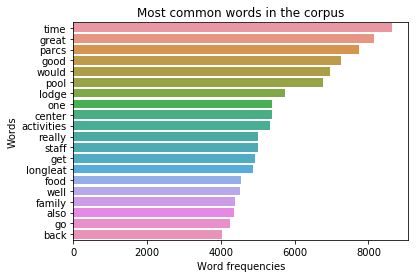

1095697


In [25]:
# Making a first plot with original data
all_words = []
for review in all_reviews:
    for word in review.split():
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))